1                    Restaurants  Precio minimo  \
1                   A_la_Turca           3110   
2                       Beirut           2175   
3                      Bone_Ma           4270   
4                   BuOna_Sera              0   
5            Cafe_D_la_Esquina           3050   
7                     Casa_Mia           3200   
8                     Conejito            840   
9                 Cuatro_Lunas           4800   
10                   Decameron           4420   
11                 Distrito_25           1000   
12                   El_Bejuco           1200   
13                El_CaribeÃ±o           1400   
14                El_Cochinito              0   
15                 El_Mandarin            705   
16                       Gusto           3080   
17                        HM_7           4400   
18                  La_Bichota           4750   
19                  La_Carreta           2460   
20  La_Giraldilla_de_G_Ranchon            310   
21      La_Mansion

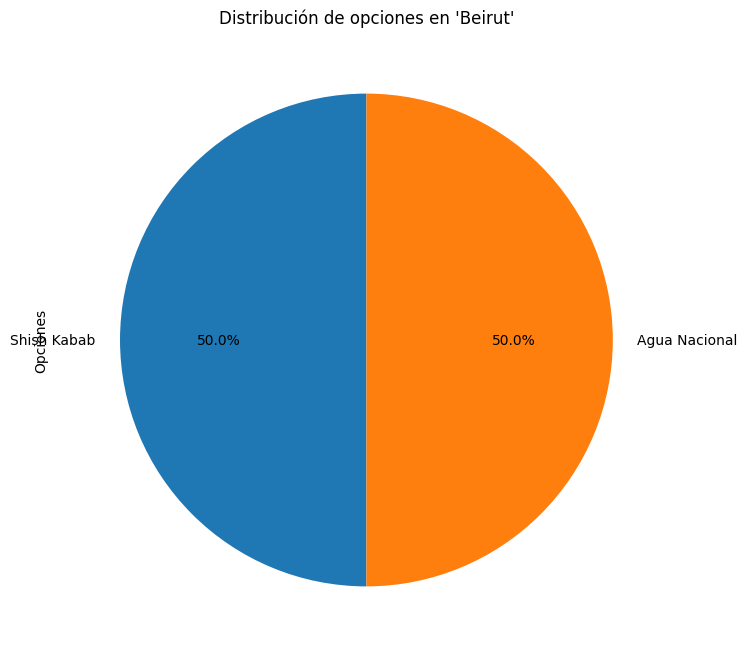

In [31]:
from Proyecto import precios,minimo,pastel,total
import pandas as pd
import matplotlib.pyplot as plt
municipio=input("nombre del Municipio")
df_completo,restaurantes  =  precios( './Proyecto-ICD/'+ municipio)
df_minimo=df_completo.applymap(minimo)
Precio = df_minimo.apply(lambda row: row.apply(lambda x: x[0] if x is not None else 0).sum(), axis=1)
cantidad = df_minimo.apply(lambda row: row.apply(lambda x: x[1] if isinstance(x,list) and x[1] is not None else None).tolist(), axis=1)
nuevo_df = pd.DataFrame({ "Restaurants": restaurantes, "Precio minimo": Precio, "Opciones":cantidad })
money_you_have=input("Escribe el presupuesto para una persona que posees")
Restaurante_Disponibles=nuevo_df[nuevo_df["Precio minimo"]<= int(money_you_have)]
if Restaurante_Disponibles.empty:
    print("No tenemos restaurantes con ese precio")
else: 
    print(1,Restaurante_Disponibles)  

seleccionado=input("nombre del restaurante")
valor=pastel(Restaurante_Disponibles,seleccionado) 

if not valor.empty:
    
    plt.figure(figsize=(8, 8))
    valor.plot.pie(autopct="%1.1f%%", startangle=90)
    plt.title(f"Distribución de opciones en '{seleccionado}'")
    plt.show()  

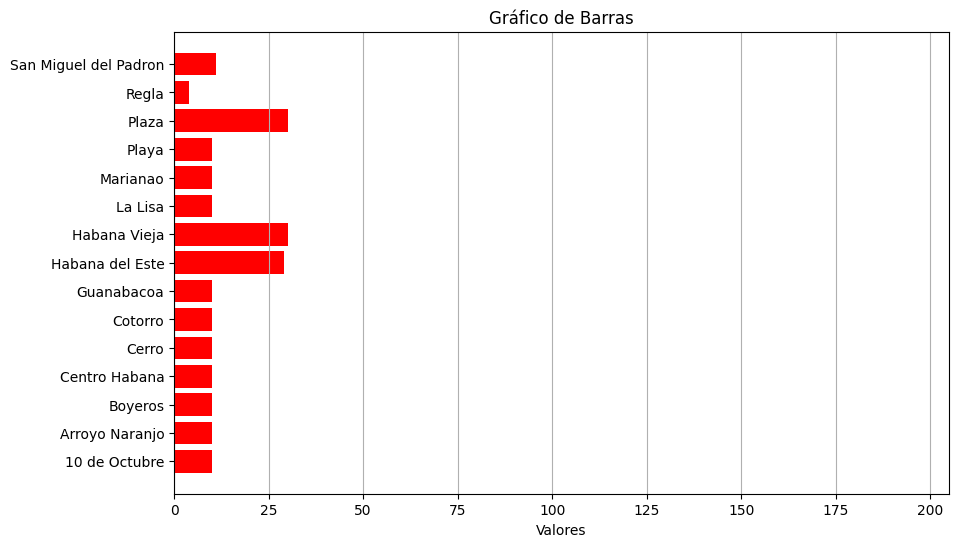

In [41]:
#from Proyecto import Total
import os
carpeta='./Proyecto-ICD'
cantidad_restaurantes=[]
for archivo in os.listdir('./Proyecto-ICD') :
    ruta_completa = os.path.join(carpeta, archivo) 
    if os.path.isdir(ruta_completa):  
       cantidad_restaurantes.append([ archivo,total(ruta_completa)])
nombres = []
valores = []
for i in cantidad_restaurantes:
    nombres.append(i[0])
    valores.append(i[1])
plt.figure(figsize=(10, 6))
plt.barh(nombres, valores, color='red') 
plt.xlabel('Valores') 
plt.title('Gráfico de Barras') 
plt.grid(axis='x') 
plt.xlim(0, 205) 
plt.show()

In [33]:
a=input("Nombre del municipio")
df_completo,restaurantes  =  precios( os.path.join(carpeta, a))
df_minimo=df_completo.applymap(minimo)
Precio = df_minimo.apply(lambda row: row.apply(lambda x: x[0] if x is not None else 0).sum(), axis=1)
cantidad = df_minimo.apply(lambda row: row.apply(lambda x: x[1] if isinstance(x,list) and x[1] is not None else None).tolist(), axis=1)
nuevo_df = pd.DataFrame({ "Restaurants": restaurantes, "Precio minimo": Precio, "Opciones":cantidad })
print(nuevo_df)

         Restaurants  Precio minimo  \
0          Atraccion           2180   
1          Casa_Godo           2150   
2             D'Mitu            380   
3            Diverxo           3010   
4      Joe's_Burguer              0   
5             Kimera           1750   
6         Lacret_559           1250   
7          La_Fuente           3505   
8  Mirador_de_Acosta           4110   
9       Nel_Paradiso           3058   

                                            Opciones  
0  [Ensalada Fria de Jamon, Pizza de Queso Napoli...  
1  [Croquetas de Pescado, Pollo Deshuesado, Torta...  
2                 [None, Pizza de Queso, None, None]  
3  [None, Espaguetis Napolitana, None, Termo de C...  
4                           [None, None, None, None]  
5  [Ensalada de Vegetales, Espaguetis Napolitano,...  
6  [Totopitos Picantes, Hamburguesa de Res, None,...  
7  [Baguette all Oleo, Bistec de Cerdo Grille, Po...  
8  [Tamal en Cazuela, Pollo Frito, Arroz con Lech...  
9  [Crema de Calabaz

In [60]:
from Proyecto import minimo
minimo_s=[]
for archivo in os.listdir('./Proyecto-ICD') :
    ruta_completa = os.path.join(carpeta, archivo) 
    if os.path.isdir(ruta_completa):  
       print(archivo)
       df_completo,restaurantes  =  precios(ruta_completa)
       df_minimo=df_completo.applymap(minimo)
       Precio = df_minimo.apply(lambda row: row.apply(lambda x: x[0] if x is not None else 0).sum(), axis=1)
       cantidad = df_minimo.apply(lambda row: row.apply(lambda x: x[1] if isinstance(x,list) and x[1] is not None else None).tolist(), axis=1)
       nuevo_df = pd.DataFrame({ "Restaurants": restaurantes, "Precio minimo": Precio, "Opciones":cantidad })
       nuevo_df = nuevo_df.drop(nuevo_df[nuevo_df['Precio minimo'] == 0].index)
       a=nuevo_df["Precio minimo"].min()
       minimo_s.append((a, archivo))
       print(a)
plt.figure(figsize=(10, 6)) 
plt.barh(df_minimo['Archivo'], df_minimo['Precio minimo'], color='skyblue')
plt.xlabel('Precio Mínimo')
plt.ylabel('Archivos')
plt.title('Ranking de Precios Mínimos')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

10 de Octubre
380
Arroyo Naranjo
720
Boyeros
920
Centro Habana
620
Cerro
410
Cotorro
900
Guanabacoa
350
Habana del Este
703
Habana Vieja


KeyError: 'menu and prices'